<a href="https://colab.research.google.com/github/muhammadhemdan/images-classifier/blob/master/images-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 102.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 104.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 19.3 MB/s eta 0:00:00
Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.widgets import *

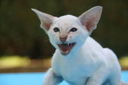

In [4]:
urls = search_images_ddg('cat', 100)
len(urls),urls[0]
download_url(urls[0], 'images/cat.jpg')
im = Image.open('images/cat.jpg')
im.thumbnail((128,128))
im

In [6]:
#download iamges from DuckDuckGo search engine
data_types = 'cat','dog'
path = Path('images')
path.delete()
if not path.exists():
    print(path)
    path.mkdir()
    for o in data_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        urls = search_images_ddg(o)
        #urls = search_images_ddg(key, 100)
        #print(results)
        download_images(dest, urls=urls)

images


In [7]:
fns = get_image_files(path)
fns

(#373) [Path('images/dog/70247888-b653-49e6-82aa-2e4750a117ef.jpg'),Path('images/dog/f0e017b0-e206-4f72-8f55-131333f97182.jpg'),Path('images/dog/b909e583-2702-4ca4-9a4e-ddd93b484635.jpg'),Path('images/dog/28a3ad26-791f-4968-99db-0fc69ef5359a.jpg'),Path('images/dog/da11691e-3bde-4441-adea-d28f68f795f2.jpg'),Path('images/dog/35772f9c-4faf-472f-80f9-f0dbbdd74691.jpg'),Path('images/dog/850ebdc5-2973-421b-9361-4f319bc6e411.jpg'),Path('images/dog/bea04651-474b-494b-bba6-f99cb2fe921d.jpg'),Path('images/dog/52de2ead-5bff-478e-b1b5-8ca6401e1e22.jpg'),Path('images/dog/7db345df-32fd-4f75-acf7-23f96df7d7ad.jpg')...]

In [8]:
failed = verify_images(fns)
failed

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


(#9) [Path('images/dog/da9ed05d-ceb6-40a5-ae21-fd9a75588126.jpg'),Path('images/dog/eb2abe90-19b8-4183-b7a4-d80f0e08b3d6.jpg'),Path('images/cat/ba936e40-ea0d-4787-a62d-faf60d27dae8.jpg'),Path('images/cat/b2fdf6ca-0177-4a3b-9e96-eaf91c679a1c.gif'),Path('images/cat/2b534f33-f660-4341-a130-60fcad5ad78e.jpg'),Path('images/cat/c8611159-7a4a-499e-8db0-0f0db051e293.jpg'),Path('images/cat/26db4211-fb69-4ade-b6d3-7c1507eeaf8c.jpg'),Path('images/cat/c0927cdb-0b06-4857-9d6f-fae3fe8e9065.gif'),Path('images/cat/ad22a6c4-414f-49ce-af9d-dca61fc684cf.gif')]

In [9]:
failed.map(Path.unlink);

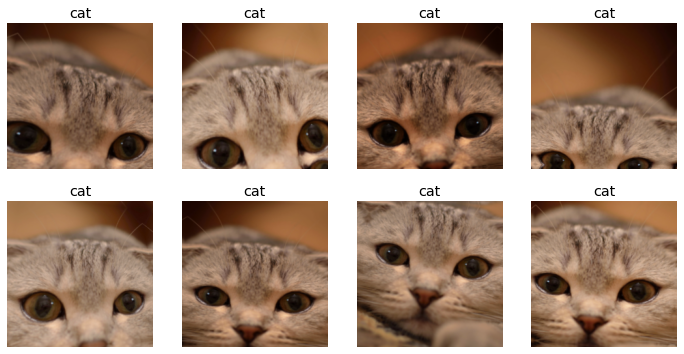

In [10]:
#upload images to data loader
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

data = data.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = data.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=true)

In [11]:
#train the model
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pt

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.188064,0.403635,0.138889,00:16


/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,time
0,0.398163,0.189090,0.069444,00:14
1,0.283759,0.182430,0.055556,00:15
2,0.226077,0.192896,0.041667,00:15
3,0.184683,0.200822,0.055556,00:16


/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


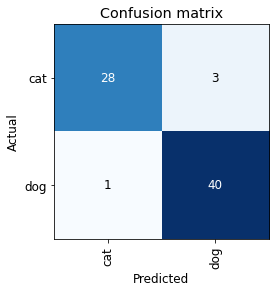

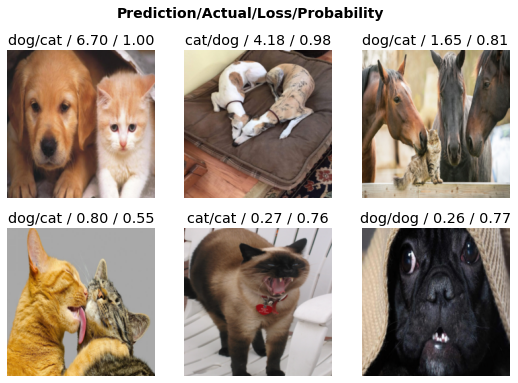

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(6, nrows=2)

In [13]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


In [12]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [14]:
learn.export()

In [15]:
path = Path()
print(path)
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab

.


['cat', 'dog']

In [16]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [18]:
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: cat; Probability: 0.9990')

In [19]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [20]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

In [22]:
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [23]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [24]:
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila 